In [6]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.cluster.vq import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow

Using TensorFlow backend.


In [23]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [47]:
download scipy import optimize, special

SyntaxError: invalid syntax (<ipython-input-47-6fbaddd12dea>, line 1)

# Training on Neural Networks Using Keras

In [31]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    im = cv2.resize(cv2.imread('cat.jpg'), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('vgg16_weights.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    print np.argmax(out)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/imgwarp.cpp:3492: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize


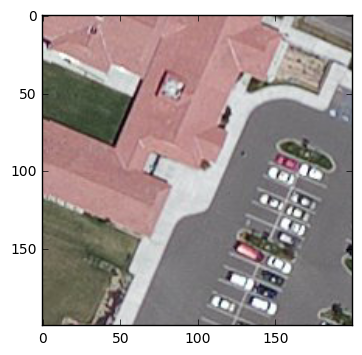

In [26]:
#Get data, converts data to RGB matplotlib array 

image = mpimg.imread("./data/_0_0.tif")
plt.imshow(image)
plt.show()
flat_array = image.flatten()

In [22]:
#convert all the images to JPG

from PIL import Image
import glob, os

folder = "./data/train/grass/"

import os
for infile in os.listdir(folder):
    print "file : " + infile
    if infile[-3:] == "tif" or infile[-3:] == "bmp" :
       # print "is tif or bmp"
       outfile = infile[:-3] + "jpeg"
       im = Image.open(folder + infile)
       print "new filename : " + outfile
       out = im.convert("RGB")
       out.save(folder +outfile, "JPEG", quality=90)

file : _0_600.tif
new filename : _0_600.jpeg
file : _0_800.tif
new filename : _0_800.jpeg


In [28]:
from PIL import Image
import glob
flat_image_list = []
for filename in glob.glob('./data/*.jpg'): #assuming tif
    #opens gif as RGD and flattens images to single vectors from (200, 200, 3)
    im= mpimg.imread(filename).flatten()
    flat_image_list.append(im)

# keras Image Augmentation API

In [19]:
image_list[0].shape

(200, 200, 3)

In [24]:
ls

Clustering on original image.ipynb
Clustering on original image.ipynb.save
DataPrep.py
Feature Detection.ipynb
GoogleDeepLearning/
README.md
Round2_NN_Keras.ipynb
Sadat/
Test_Keras_CNN_Test_Images.ipynb
U_Net Keras.ipynb
_config.yml
data/
image_splitter2.py
preview/
sandiego-fuel-2008.tif


# Keras Classification Model Training Convolutional Net

In [32]:
# path to the model weights file.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 23 * 3
nb_validation_samples = 23 * 3
nb_epoch = 50

In [39]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

In [40]:
# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)


assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

ValueError: Layer weight shape (3, 3, 150, 64) not compatible with provided weight shape (64, 3, 3, 3)

In [41]:
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))

In [48]:
# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])


IOError: Unable to open file (Unable to open file: name = 'bottleneck_fc_model.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
save_bottlebeck_features()
train_top_model()